# Dataset Overview

This notebook will explore and analyze datasets built, using the [API](https://api.energy-charts.info) provided by [energy-charts.info](https://energy-charts.info). The following datasets are used:

### production_kw11.csv

Combined data from _/public_power_ and _/total_power_ for the 11th calendar week of 2024. Shows the electricity production for germany in GW.

Columns:

- **date**: Timestamp of the data
- **Public \<production_type\>**: Public electricity production for each production type
- **Total \<production_type\>**: Total electricity production for each production type

### installed_kw11.csv

Data from _/installed_power_ for the 11th calendar week of 2024. Shows the installed power for a specific country in GW except for battery storage capacity, which is given in GWh for a given year.

Columns:

- **time**: Year of the data
- **\<production_type\>**: Installed power for each production type

### import_export_kw6.csv

Combined data from _/cbet_ and _/cbpf_ for the 6th calendar week of 2024. Shows import and export of electricity for germany and its neighbors. Positive values indicate import, negative values export.

Columns:

- **date**: Timestamp of the data
- **CBET \<country\>**: Cross-border electricity trading for each _country_
- **CBPF \<country\>**: Cross-border physical flows of electricity for each _country_

### renewable.csv

Combined data from _/ren_share_daily_avg_, _/solar_share_daily_avg_, _/wind_onshore_share_daily_avg_ and _/wind_offshore_daily_avg_. Shows the daily average share of renewable energy of the last 365 days for germany

Columns:

- **date**: Timestamp of the data
- **solar**: Daily share of solar energy
- **wind onshore**: Daily share of onshore wind energy
- **wind offshore**: Daily share of off shore wind energy
- **combined**: Daily share of all renewable energy sources

### renewable_forecast.csv

Combined data from _/renewable_forecast_, _/solar_share_, _/wind_onshore_share_ and _/wind_offshore_share_ (day of data request: 2024-03-24). Shows the load share of renewable energy for a given country and a specific renewable type of the current day. Displays historical data as long as it's available (at the time of creation) then the forecast data is used.

Columns:

- **date**: Timestamp of the forecast
- **combined**: Forecasted load share of all renewable energy sources combined
- **\<share_type\>**: Forecasted load share for each renewable energy source
- **\<share_type\> source**: The source of the data ('forecast' or 'data' for historical data)

### trafic_light.csv

Data from _/signal_ (day of data request: 2024-03-24). Prediction of the share of renewable load and the corresponding traffic light for the day of creation.

Columns:

- **date**: Timestamp of the prediction
- **share**: Predicted share of renewable load
- **signal**: The traffic light signal corresponding to the predicted share of renewable load


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

base_path = Path("../files/energy_charts")
colors = [
    "#3D6090",
    "#7EC9EE",
    "#4FB4A3",
    "#E2D072",
    "#DB667A",
    "#C552B1",
    "#057EAD",
    "#53CAF6",
    "#01BAA5",
    "#F67831",
    "#D8320D",
    "#FB2673",
]

# Power Production


## Public Production


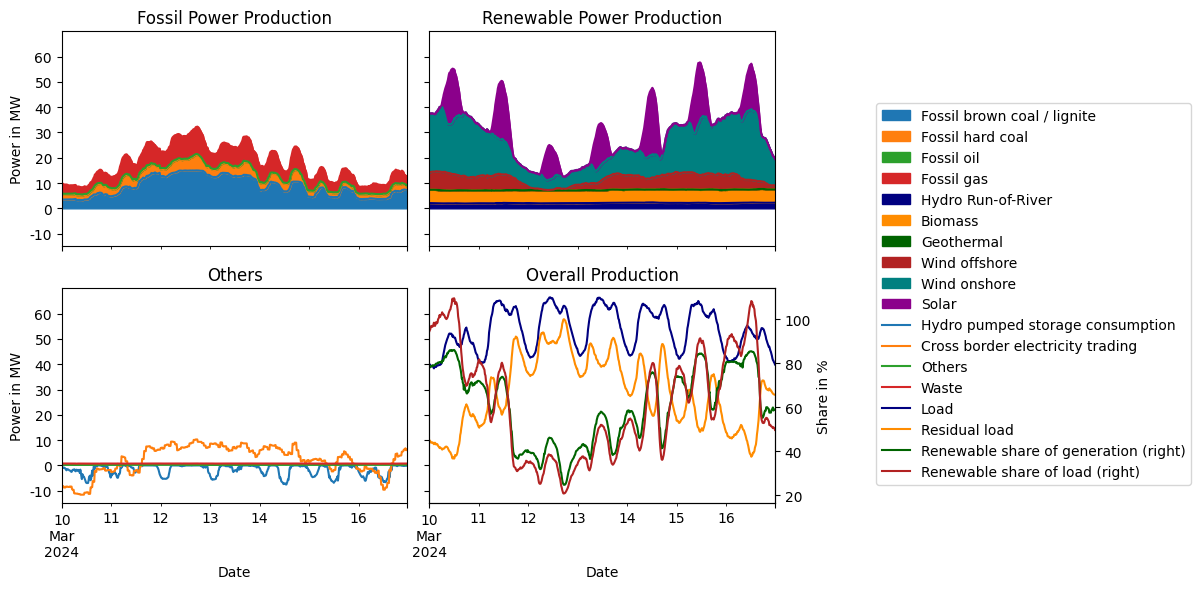

In [67]:
df = pd.read_csv(
    base_path / "production_kw11.csv", index_col="date", parse_dates=["date"]
)
public_columns = [col for col in df.columns if col.startswith("Public")]
df_public = df[public_columns]
df_public = df_public.rename(
    columns={col: col.replace("Public ", "") for col in public_columns}
)

y_range = (-15e3, 70e3)
y_ticks = (-10e3, 0, 10e3, 20e3, 30e3, 40e3, 50e3, 60e3)
y_tick_labels = (-10, 0, 10, 20, 30, 40, 50, 60)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 6))
fig.tight_layout(rect=[0, 0, 0.75, 1])

fossil_col = [
    "Fossil brown coal / lignite",
    "Fossil hard coal",
    "Fossil oil",
    "Fossil gas",
]
ax = df_public.plot.area(y=fossil_col, ax=axs[0, 0])
ax.set_title("Fossil Power Production")
ax.set_ylim(bottom=y_range[0], top=y_range[1])
ax.set_yticks(y_ticks, labels=y_tick_labels)
ax.set_ylabel("Power in MW")
ax.set_xlabel("Date")
ax.get_legend().remove()

ren_col = [
    "Hydro Run-of-River",
    "Biomass",
    "Geothermal",
    "Wind offshore",
    "Wind onshore",
    "Solar",
]
ax = df_public.plot.area(
    y=ren_col,
    ax=axs[0, 1],
    color=["navy", "darkorange", "darkgreen", "firebrick", "teal", "darkmagenta"],
)
ax.set_title("Renewable Power Production")
ax.set_ylim(bottom=y_range[0], top=y_range[1])
ax.set_yticks(y_ticks, labels=y_tick_labels)
ax.set_ylabel("Power in MW")
ax.set_xlabel("Date")
ax.get_legend().remove()

other_col = [
    "Hydro pumped storage consumption",
    "Cross border electricity trading",
    "Others",
    "Waste",
]
df_others = df_public[other_col]
ax = df_others.plot(y=other_col, ax=axs[1, 0])
ax.set_title("Others")
ax.set_ylim(bottom=y_range[0], top=y_range[1])
ax.set_yticks(y_ticks, labels=y_tick_labels)
ax.set_ylabel("Power in MW")
ax.set_xlabel("Date")
ax.get_legend().remove()

load_col = [
    "Load",
    "Residual load",
]
ren_share_col = [
    "Renewable share of generation",
    "Renewable share of load",
]
ax = df_public.plot(y=load_col, ax=axs[1, 1], color=["navy", "darkorange"])
ax2 = df_public.plot(
    y=ren_share_col,
    ax=axs[1, 1],
    secondary_y=True,
    color=["darkgreen", "firebrick"],
)
ax.set_title("Overall Production")
ax.set_ylim(bottom=y_range[0], top=y_range[1])
ax.set_yticks(y_ticks, labels=y_tick_labels)
ax.set_ylabel("Power in MW")
ax2.set_ylabel("Share in %")
ax.set_xlabel("Date")
ax.get_legend().remove()


fig.legend(loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.65)
plt.show()

### Public Production Statistics


In [20]:
df_public.describe()

Hydro pumped storage consumption  Cross border electricity trading  \
count                        672.000000                        672.000000   
mean                       -1796.111310                       2281.073810   
std                         2105.122042                       5750.503079   
min                        -7552.800000                     -11593.700000   
25%                        -3268.975000                      -1581.775000   
50%                         -719.150000                       3471.150000   
75%                          -57.525000                       7047.500000   
max                           -0.600000                      10266.500000   

       Hydro Run-of-River      Biomass  Fossil brown coal / lignite  \
count          672.000000   672.000000                   672.000000   
mean          2101.626786  5161.797173                  8640.300595   
std            104.852920   112.738764                  3930.495952   
min           1896.200000  4903.800000                  3180.800000   
25%           2017.300000  5074.950000                  4832.025000   
50%           2086.550000  5154.000000                  7934.650000   
75%           2191.325000  5235.250000                 12725.825000   
max           2354.600000  5461.700000                 14990.000000   

       Fossil hard coal  Fossil oil    Fossil gas  Geothermal  \
count        672.000000  672.000000    672.000000       672.0   
mean        2915.235565  369.561607   6002.497173        21.0   
std         1069.314265   12.976834   2152.510260         0.0   
min         1316.700000  361.400000   2670.200000        21.0   
25%         1900.425000  367.100000   4242.275000        21.0   
50%         2844.150000  368.450000   5748.900000        21.0   
75%         3562.950000  369.900000   7647.000000        21.0   
max         6138.800000  513.400000  10910.600000        21.0   

       Hydro water reservoir  Hydro pumped storage      Others       Waste  \
count             672.000000            672.000000  672.000000  672.000000   
mean              131.040476           1374.901488  188.402679  728.838988   
std                89.835315           2004.720370   19.496844   20.025211   
min                12.300000              0.100000  160.800000  660.600000   
25%                68.600000             90.425000  175.525000  718.200000   
50%               100.650000            349.550000  187.300000  732.400000   
75%               169.950000           1841.175000  194.700000  743.400000   
max               526.200000           8107.100000  267.300000  768.400000   

       Wind offshore  Wind onshore         Solar          Load  Residual load  \
count     672.000000    672.000000    672.000000    672.000000     672.000000   
mean     4574.677381  14519.503274   5530.568006  53648.118452   29023.372173   
std      2075.745408   7350.938054   7713.128405   8242.332830   14244.490582   
min       259.300000   3805.500000      0.000000  38376.200000    2665.600000   
25%      2828.025000   7035.925000      0.000000  46304.275000   17202.975000   
50%      5482.800000  14350.850000     16.550000  53540.600000   29380.650000   
75%      6192.275000  21491.650000  11101.075000  61620.575000   40604.175000   
max      7389.600000  27997.000000  26266.300000  66455.600000   57824.200000   

       Renewable share of generation  Renewable share of load  
count                     672.000000               672.000000  
mean                       60.835565                61.744940  
std                        16.754348                24.068916  
min                        24.800000                20.800000  
25%                        44.575000                38.000000  
50%                        61.350000                58.750000  
75%                        74.800000                79.500000  
max                        86.000000               109.500000

### Public Production missing values


In [23]:
df_public.isnull().sum()

Hydro pumped storage consumption    0
Cross border electricity trading    0
Hydro Run-of-River                  0
Biomass                             0
Fossil brown coal / lignite         0
Fossil hard coal                    0
Fossil oil                          0
Fossil gas                          0
Geothermal                          0
Hydro water reservoir               0
Hydro pumped storage                0
Others                              0
Waste                               0
Wind offshore                       0
Wind onshore                        0
Solar                               0
Load                                0
Residual load                       0
Renewable share of generation       0
Renewable share of load             0
dtype: int64

## Total Production


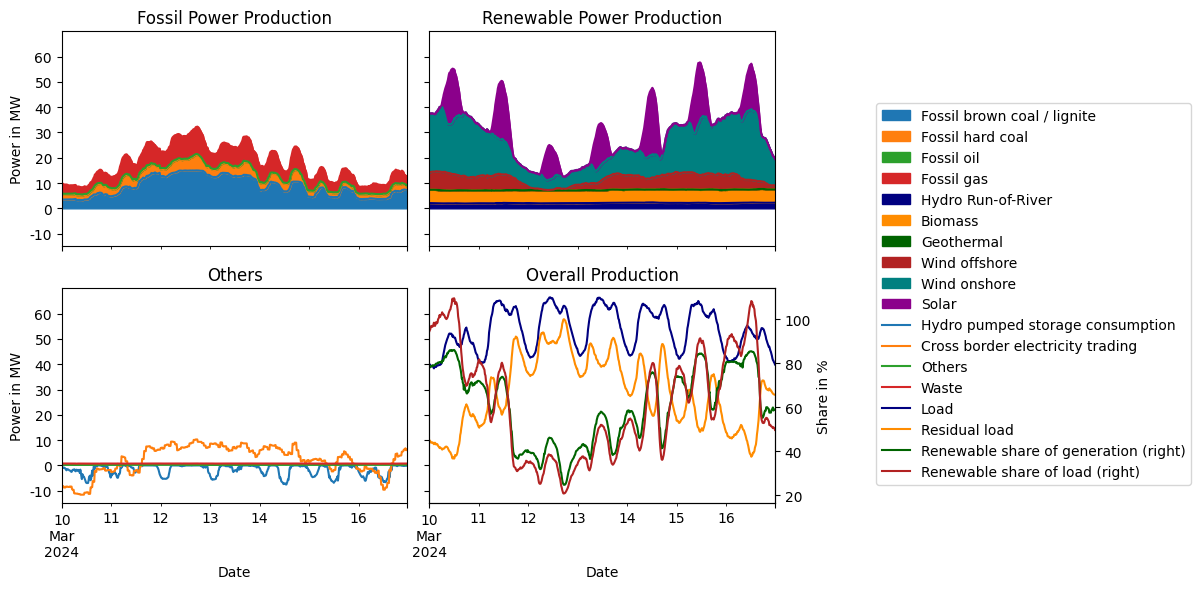

In [68]:
df = pd.read_csv(
    base_path / "production_kw11.csv", index_col="date", parse_dates=["date"]
)
total_columns = [col for col in df.columns if col.startswith("Total")]
df_total = df[total_columns]
df_total = df_public.rename(
    columns={col: col.replace("Total ", "") for col in total_columns}
)

y_range = (-15e3, 70e3)
y_ticks = (-10e3, 0, 10e3, 20e3, 30e3, 40e3, 50e3, 60e3)
y_tick_labels = (-10, 0, 10, 20, 30, 40, 50, 60)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 6))
fig.tight_layout(rect=[0, 0, 0.75, 1])

fossil_col = [
    "Fossil brown coal / lignite",
    "Fossil hard coal",
    "Fossil oil",
    "Fossil gas",
]
ax = df_total.plot.area(y=fossil_col, ax=axs[0, 0])
ax.set_title("Fossil Power Production")
ax.set_ylim(bottom=y_range[0], top=y_range[1])
ax.set_yticks(y_ticks, labels=y_tick_labels)
ax.set_ylabel("Power in MW")
ax.set_xlabel("Date")
ax.get_legend().remove()

ren_col = [
    "Hydro Run-of-River",
    "Biomass",
    "Geothermal",
    "Wind offshore",
    "Wind onshore",
    "Solar",
]
ax = df_total.plot.area(
    y=ren_col,
    ax=axs[0, 1],
    color=["navy", "darkorange", "darkgreen", "firebrick", "teal", "darkmagenta"],
)
ax.set_title("Renewable Power Production")
ax.set_ylim(bottom=y_range[0], top=y_range[1])
ax.set_yticks(y_ticks, labels=y_tick_labels)
ax.set_ylabel("Power in MW")
ax.set_xlabel("Date")
ax.get_legend().remove()

other_col = [
    "Hydro pumped storage consumption",
    "Cross border electricity trading",
    "Others",
    "Waste",
]
df_others = df_total[other_col]
ax = df_others.plot(y=other_col, ax=axs[1, 0])
ax.set_title("Others")
ax.set_ylim(bottom=y_range[0], top=y_range[1])
ax.set_yticks(y_ticks, labels=y_tick_labels)
ax.set_ylabel("Power in MW")
ax.set_xlabel("Date")
ax.get_legend().remove()

load_col = [
    "Load",
    "Residual load",
]
ren_share_col = [
    "Renewable share of generation",
    "Renewable share of load",
]
ax = df_total.plot(y=load_col, ax=axs[1, 1], color=["navy", "darkorange"])
ax2 = df_total.plot(
    y=ren_share_col,
    ax=axs[1, 1],
    secondary_y=True,
    color=["darkgreen", "firebrick"],
)
ax.set_title("Overall Production")
ax.set_ylim(bottom=y_range[0], top=y_range[1])
ax.set_yticks(y_ticks, labels=y_tick_labels)
ax.set_ylabel("Power in MW")
ax2.set_ylabel("Share in %")
ax.set_xlabel("Date")
ax.get_legend().remove()


fig.legend(loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.65)
plt.show()

### Total Production Statistics


In [69]:
df_total.describe()

Hydro pumped storage consumption  Cross border electricity trading  \
count                        672.000000                        672.000000   
mean                       -1796.111310                       2281.073810   
std                         2105.122042                       5750.503079   
min                        -7552.800000                     -11593.700000   
25%                        -3268.975000                      -1581.775000   
50%                         -719.150000                       3471.150000   
75%                          -57.525000                       7047.500000   
max                           -0.600000                      10266.500000   

       Hydro Run-of-River      Biomass  Fossil brown coal / lignite  \
count          672.000000   672.000000                   672.000000   
mean          2101.626786  5161.797173                  8640.300595   
std            104.852920   112.738764                  3930.495952   
min           1896.200000  4903.800000                  3180.800000   
25%           2017.300000  5074.950000                  4832.025000   
50%           2086.550000  5154.000000                  7934.650000   
75%           2191.325000  5235.250000                 12725.825000   
max           2354.600000  5461.700000                 14990.000000   

       Fossil hard coal  Fossil oil    Fossil gas  Geothermal  \
count        672.000000  672.000000    672.000000       672.0   
mean        2915.235565  369.561607   6002.497173        21.0   
std         1069.314265   12.976834   2152.510260         0.0   
min         1316.700000  361.400000   2670.200000        21.0   
25%         1900.425000  367.100000   4242.275000        21.0   
50%         2844.150000  368.450000   5748.900000        21.0   
75%         3562.950000  369.900000   7647.000000        21.0   
max         6138.800000  513.400000  10910.600000        21.0   

       Hydro water reservoir  Hydro pumped storage      Others       Waste  \
count             672.000000            672.000000  672.000000  672.000000   
mean              131.040476           1374.901488  188.402679  728.838988   
std                89.835315           2004.720370   19.496844   20.025211   
min                12.300000              0.100000  160.800000  660.600000   
25%                68.600000             90.425000  175.525000  718.200000   
50%               100.650000            349.550000  187.300000  732.400000   
75%               169.950000           1841.175000  194.700000  743.400000   
max               526.200000           8107.100000  267.300000  768.400000   

       Wind offshore  Wind onshore         Solar          Load  Residual load  \
count     672.000000    672.000000    672.000000    672.000000     672.000000   
mean     4574.677381  14519.503274   5530.568006  53648.118452   29023.372173   
std      2075.745408   7350.938054   7713.128405   8242.332830   14244.490582   
min       259.300000   3805.500000      0.000000  38376.200000    2665.600000   
25%      2828.025000   7035.925000      0.000000  46304.275000   17202.975000   
50%      5482.800000  14350.850000     16.550000  53540.600000   29380.650000   
75%      6192.275000  21491.650000  11101.075000  61620.575000   40604.175000   
max      7389.600000  27997.000000  26266.300000  66455.600000   57824.200000   

       Renewable share of generation  Renewable share of load  
count                     672.000000               672.000000  
mean                       60.835565                61.744940  
std                        16.754348                24.068916  
min                        24.800000                20.800000  
25%                        44.575000                38.000000  
50%                        61.350000                58.750000  
75%                        74.800000                79.500000  
max                        86.000000               109.500000

### Total Production missing values


In [70]:
df_total.isnull().sum()

Hydro pumped storage consumption    0
Cross border electricity trading    0
Hydro Run-of-River                  0
Biomass                             0
Fossil brown coal / lignite         0
Fossil hard coal                    0
Fossil oil                          0
Fossil gas                          0
Geothermal                          0
Hydro water reservoir               0
Hydro pumped storage                0
Others                              0
Waste                               0
Wind offshore                       0
Wind onshore                        0
Solar                               0
Load                                0
Residual load                       0
Renewable share of generation       0
Renewable share of load             0
dtype: int64

# Installed Power


Text(0.5, 0, 'Year')

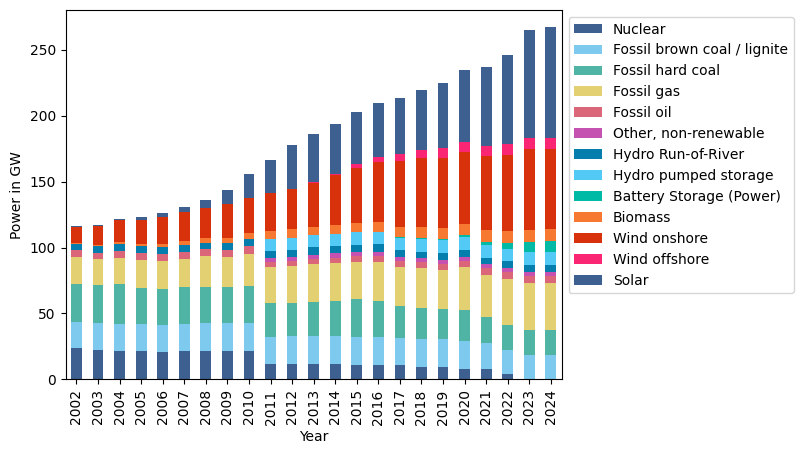

In [42]:
df = pd.read_csv(base_path / "installed_kw11.csv", index_col="time")
df_power = df.copy()
capacity = df_power.pop("Battery Storage (Capacity)")  # TODO Include in the plot
df_power.plot.bar(stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc="upper left")
plt.ylabel("Power in GW")
plt.xlabel("Year")

### Installed Power Statistics

In [43]:
df.describe()

Nuclear  Fossil brown coal / lignite  Fossil hard coal  Fossil gas  \
count  23.000000                    23.000000         23.000000   23.000000   
mean   13.703087                    20.516304         25.314913   27.089696   
std     7.324241                     0.893161          3.503326    5.335655   
min     0.000000                    18.458000         18.884000   19.400000   
25%     9.516000                    20.398000         23.779000   22.050000   
50%    12.068000                    20.859000         26.210000   28.359000   
75%    21.393000                    21.036000         27.730000   30.101000   
max    23.538000                    21.419000         30.362000   35.987000   

       Fossil oil  Other, non-renewable  Hydro Run-of-River  \
count   23.000000             14.000000           23.000000   
mean     4.894043              3.120571            5.213739   
std      0.548253              0.150287            0.249641   
min      4.136000              2.914000            4.782000   
25%      4.375000              2.948500            4.955000   
50%      5.006000              3.157500            5.210000   
75%      5.350000              3.247500            5.424500   
max      5.900000              3.322000            5.575000   

       Hydro pumped storage  Battery Storage (Power)  \
count             14.000000                23.000000   
mean               9.486929                 1.209087   
std                0.213346                 2.464192   
min                9.229000                 0.000000   
25%                9.294250                 0.000500   
50%                9.469000                 0.025000   
75%                9.638000                 0.891000   
max                9.814000                 8.380000   

       Battery Storage (Capacity)    Biomass  Wind onshore  Wind offshore  \
count                   23.000000  23.000000     23.000000      23.000000   
mean                     1.775739   5.668043     36.580870       3.020913   
std                      3.636951   2.856800     16.492301       3.548919   
min                      0.000000   0.996000     11.976000       0.000000   
25%                      0.000500   3.293000     22.455000       0.000000   
50%                      0.033000   6.582000     32.969000       0.508000   
75%                      1.240500   8.165000     52.757500       6.974000   
max                     12.309000   9.035000     61.151000       8.458000   

           Solar  
count  23.000000  
mean   32.286000  
std    26.374935  
min     0.296000  
25%     5.145000  
50%    36.710000  
75%    47.035500  
max    83.439000

### Installed Power missing values

In [44]:
df.isnull().sum()

Nuclear                        0
Fossil brown coal / lignite    0
Fossil hard coal               0
Fossil gas                     0
Fossil oil                     0
Other, non-renewable           9
Hydro Run-of-River             0
Hydro pumped storage           9
Battery Storage (Power)        0
Battery Storage (Capacity)     0
Biomass                        0
Wind onshore                   0
Wind offshore                  0
Solar                          0
dtype: int64

# Import/Export

## CBET

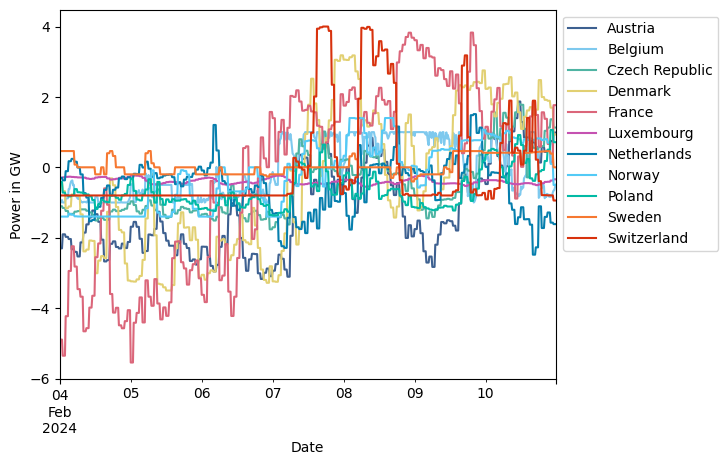

In [58]:
df = pd.read_csv(
    base_path / "import_export_kw6.csv", index_col="date", parse_dates=["date"]
)
df_cbet = df[[col for col in df.columns if "CBET" in col]]
df_cbet = df_cbet.rename(
    columns={col: col.replace("CBET ", "") for col in df_cbet.columns}
)
df_cbet.plot(y=[col for col in df_cbet.columns if col != "sum"], color=colors)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc="upper left")
plt.ylabel("Power in GW")
plt.xlabel("Date")
plt.show()

### CBET statistics

In [59]:
df_cbet.describe()

Austria     Belgium  Czech Republic     Denmark      France  \
count  672.000000  672.000000      672.000000  672.000000  672.000000   
mean    -1.229477   -0.037186       -0.525589   -0.351727   -0.210314   
std      1.243127    0.797498        0.905056    2.035727    2.607462   
min     -3.171880   -1.000000       -1.761800   -3.500000   -5.545600   
25%     -2.258025   -0.836400       -1.260350   -2.102500   -2.833125   
50%     -1.548425   -0.306200       -0.911200   -0.568500    0.695075   
75%     -0.202900    0.878675        0.118075    1.576925    1.790563   
max      1.869200    1.000100        1.789800    3.181900    3.827500   

       Luxembourg  Netherlands      Norway      Poland      Sweden  \
count  672.000000   672.000000  672.000000  672.000000  672.000000   
mean    -0.392393    -0.526335   -0.179667   -0.643417    0.048183   
std      0.081015     0.729197    0.931728    0.522789    0.251094   
min     -0.549980    -2.481650   -1.400000   -1.370400   -0.403000   
25%     -0.457597    -1.097412   -1.327500   -1.029225   -0.200000   
50%     -0.413905    -0.319100   -0.041000   -0.795650    0.000000   
75%     -0.322373    -0.083250    0.754000   -0.387550    0.389700   
max     -0.233800     1.511200    1.400000    1.062000    0.462000   

       Switzerland         sum  
count   672.000000  672.000000  
mean     -0.040697   -4.088618  
std       1.416509    8.272582  
min      -0.942900  -15.692250  
25%      -0.800000  -12.341190  
50%      -0.799760   -2.321365  
75%       0.051507    4.000965  
max       3.999500    8.028530

### CBET missing values

In [60]:
df_cbet.isnull().sum()

Austria           0
Belgium           0
Czech Republic    0
Denmark           0
France            0
Luxembourg        0
Netherlands       0
Norway            0
Poland            0
Sweden            0
Switzerland       0
sum               0
dtype: int64

## CBPF

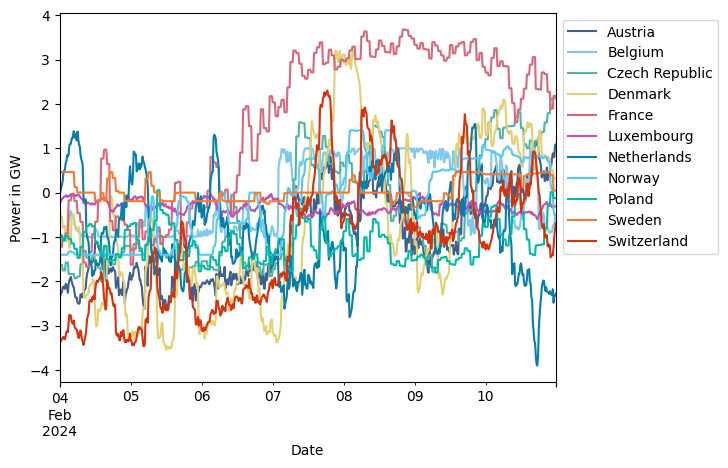

In [62]:
df = pd.read_csv(
    base_path / "import_export_kw6.csv", index_col="date", parse_dates=["date"]
)
df_cbpf = df[[col for col in df.columns if "CBPF" in col]]
df_cbpf = df_cbpf.rename(
    columns={col: col.replace("CBPF ", "") for col in df_cbpf.columns}
)
df_cbpf.plot(y=[col for col in df_cbpf.columns if col != "sum"], color=colors)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc="upper left")
plt.ylabel("Power in GW")
plt.xlabel("Date")
plt.show()

### CBPF statistics

In [63]:
df_cbpf.describe()

Austria     Belgium  Czech Republic     Denmark      France  \
count  672.000000  672.000000      672.000000  672.000000  672.000000   
mean    -1.005030   -0.099054       -0.435921   -0.693487    1.593384   
std      0.981997    0.821057        1.236773    1.827526    1.705256   
min     -2.652770   -1.002400       -2.000790   -3.545360   -1.675900   
25%     -1.878588   -0.925805       -1.560007   -2.155172   -0.190402   
50%     -1.220895   -0.406895       -0.921895   -1.107960    2.298200   
75%     -0.136100    0.832313        0.706425    1.108993    3.102723   
max      1.148970    1.002010        2.126650    3.204180    3.677220   

       Luxembourg  Netherlands      Norway      Poland      Sweden  \
count  672.000000   672.000000  672.000000  672.000000  672.000000   
mean    -0.312703    -0.806507   -0.179410   -1.152122    0.050701   
std      0.135574     1.032904    0.931190    0.413708    0.245935   
min     -0.598890    -3.898530   -1.402660   -1.802840   -0.353720   
25%     -0.425577    -1.594022   -1.332148   -1.483915   -0.193010   
50%     -0.318800    -0.813710   -0.042315   -1.221790    0.000000   
75%     -0.214255    -0.122732    0.755280   -0.875217    0.319422   
max     -0.006150     1.550050    1.405600    0.053970    0.463190   

       Switzerland         sum  
count   672.000000  672.000000  
mean     -1.199043   -4.239192  
std       1.448573    7.791695  
min      -3.463700  -16.000840  
25%      -2.448900  -11.879730  
50%      -1.100940   -3.534055  
75%      -0.188970    3.479390  
max       2.303080    7.893370

### CBPF missing values

In [64]:
df_cbpf.isnull().sum()

Austria           0
Belgium           0
Czech Republic    0
Denmark           0
France            0
Luxembourg        0
Netherlands       0
Norway            0
Poland            0
Sweden            0
Switzerland       0
sum               0
dtype: int64

# Traffic Light

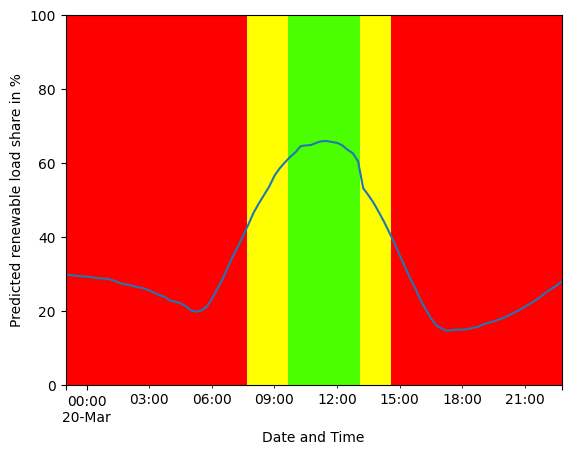

In [101]:
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv(
    base_path / "traffic_light.csv", index_col="date", parse_dates=["date"]
)

signal = df["signal"].values
signal = [sig if sig >= 0 else 0 for sig in signal]

fig = df.plot(y="share")
plt.ylim(0, 100)
fig.pcolorfast(
    fig.get_xlim(),
    fig.get_ylim(),
    [df["signal"].values],
    cmap=LinearSegmentedColormap.from_list(
        "RdYlGr", ((1.0, 0.0, 0.0), (1.0, 1.0, 0.0), (0.3, 1.0, 0.0)), N=3
    ),
)
plt.ylabel("Predicted renewable load share in %")
plt.xlabel("Date and Time")
fig.get_legend().remove()
plt.show()

### Traffic Light statistics

In [98]:
df.describe()

share     signal
count  96.000000  96.000000
mean   33.714583   0.437500
std    16.587421   0.737171
min    14.600000   0.000000
25%    21.175000   0.000000
50%    27.750000   0.000000
75%    46.525000   1.000000
max    65.900000   2.000000

### Trafic Light missing values

In [99]:
df.isnull().sum()

share     0
signal    0
dtype: int64

# Renewable Share

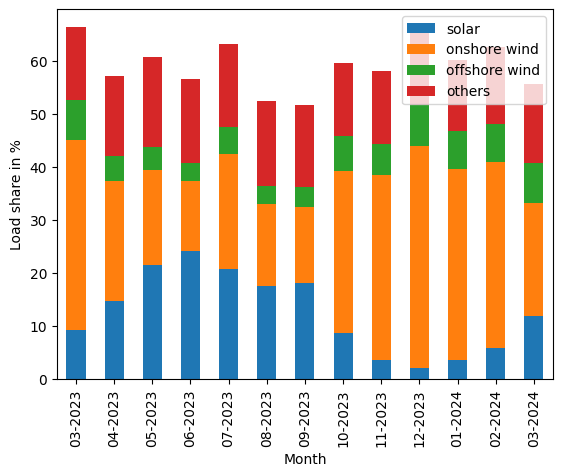

In [144]:
df = pd.read_csv(base_path / "renewable.csv", index_col="date", parse_dates=["date"])

df_monthly = df.groupby(pd.Grouper(freq="ME")).mean()
combined = df_monthly.pop("combined")
df_monthly["others"] = combined - df_monthly.sum(axis=1)

fig = df_monthly.plot.bar(stacked=True)
fig.set_xticklabels([dt.strftime("%m-%Y") for dt in df_monthly.index])
plt.ylabel("Load share in %")
plt.xlabel("Month")
plt.show()

### Renewable Share statistics

In [133]:
df.describe()

solar  onshore wind  offshore wind    combined
count  365.000000    365.000000     365.000000  365.000000
mean    12.681644     25.829041       5.522192   59.022192
std      8.752150     17.717973       3.037979   17.655004
min      0.400000      1.400000       0.300000   17.800000
25%      4.500000     11.900000       2.900000   45.900000
50%     11.500000     20.800000       5.400000   57.300000
75%     19.500000     35.800000       7.700000   70.600000
max     36.600000     79.500000      13.800000  109.100000

### Renewable Share missing values

In [134]:
df.isnull().sum()

solar            0
onshore wind     0
offshore wind    0
combined         0
dtype: int64

# Renewable Forecast

Red Background: Historical data, Green Background: Forecast


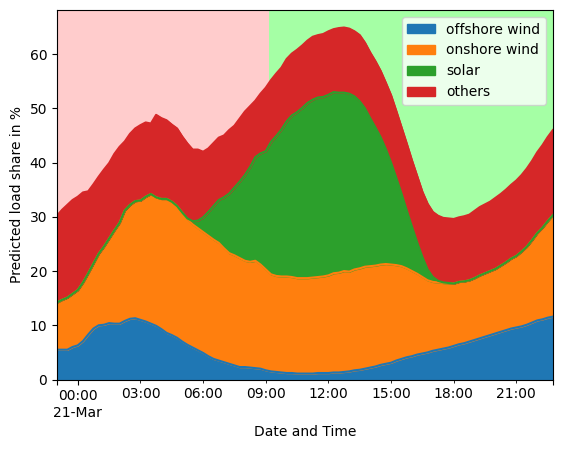

In [161]:
df = pd.read_csv(
    base_path / "renewable_forecast.csv", index_col="date", parse_dates=["date"]
)

combined = df["combined"]
df["others"] = combined - df[["offshore wind", "onshore wind", "solar"]].sum(axis=1)
fig = df.plot.area(y=["offshore wind", "onshore wind", "solar", "others"], stacked=True)
fig.pcolorfast(
    fig.get_xlim(),
    fig.get_ylim(),
    [[0 if src == "data" else 1 for src in df["solar source"].values]],
    cmap=LinearSegmentedColormap.from_list(
        "RdYlGr", ((1.0, 0.8, 0.8), (0.65, 1.0, 0.65)), N=2
    ),
)
plt.ylabel("Predicted load share in %")
plt.xlabel("Date and Time")
print("Red Background: Historical data, Green Background: Forecast")
plt.show()

### Renewable Forecast statistics

In [147]:
df.describe()

combined      solar  onshore wind  offshore wind     others
count  96.000000  76.000000     96.000000      96.000000  96.000000
mean   45.327083  12.226316     17.014583       5.685417  12.947917
std    10.938974  13.069612      4.192273       3.458749   1.559418
min    29.600000   0.000000      8.700000       1.100000  10.400000
25%    35.675000   0.000000     13.125000       2.275000  11.700000
50%    44.650000   7.050000     17.700000       5.500000  12.200000
75%    52.975000  25.575000     19.650000       8.875000  14.000000
max    64.900000  33.400000     24.700000      11.600000  17.300000

### Renewable Forecast missing values

In [148]:
df.isnull().sum()

combined                 0
solar                   20
solar source            20
onshore wind             0
onshore wind source      0
offshore wind            0
offshore wind source     0
others                   0
dtype: int64

# Price

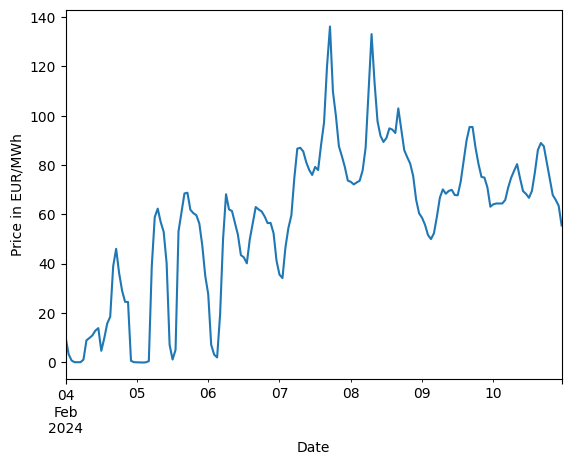

In [163]:
df = pd.read_csv(base_path / "price_kw6.csv", index_col="date", parse_dates=["date"])

fig = df.plot()
fig.get_legend().remove()
plt.ylabel("Price in EUR/MWh")
plt.xlabel("Date")
plt.show()

### Price statistics

In [164]:
df.describe()

price
count  168.000000
mean    58.178988
std     30.845578
min     -0.130000
25%     40.915000
50%     63.770000
75%     77.995000
max    136.220000

### Price missing values

In [165]:
df.isnull().sum()

price    0
dtype: int64